In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.widgets import Cursor
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
from scipy.stats import norm
from sympy import *
plt.rcParams.update({'font.size': 12})
formatter = mticker.ScalarFormatter(useMathText=True)
plt.rcParams["axes.formatter.use_mathtext"] = True

In [2]:
# def gaussiana(x, sigma, mi):
#     return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(x - mi)**2/(2*sigma**2)) + 600

def gaussiana(x, sigma, mi, a, H):
    return a*np.exp(-(x - mi)**2/(2*sigma**2)) + H

def gaussiana_fit(dados_x, dados_y):

    media = sum(dados_x*dados_y)/sum(dados_y)
    sigma =np.sqrt(sum(dados_y* (dados_x - media)**2)/sum(dados_y))
    popt, pcov = curve_fit(
    f = gaussiana,
    xdata = dados_x,
    ydata = dados_y,
    p0 = [media, sigma, 1, 1],
    maxfev=50000
)
    return [popt, np.sqrt(np.diag(pcov))]

In [3]:
gauss_nacl = pd.read_csv('./Dados/nacl_18.csv',sep='\s', decimal=',')
gauss_nacl_x = np.array(gauss_nacl['Ângulo'])
gauss_nacl_y = np.array(gauss_nacl['R'])
c = 299792458
h = 4.135668e-15
d = 2.82e-10
gauss_nacl_x_e = 1e-3 * h*c/(2*d*np.sin(gauss_nacl_x * np.pi/180))


C:\Users\victo\AppData\Local\Temp\ipykernel_22320\1885802778.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  gauss_nacl = pd.read_csv('./Dados/nacl_18.csv',sep='\s', decimal=',')


Plot

In [4]:
# par = gaussiana_fit(gauss_nacl_x[35:45], gauss_nacl_y[35:45])
# par[1]

In [5]:
par = gaussiana_fit(gauss_nacl_x[35:45], gauss_nacl_y[35:45])
x_model = np.linspace(min(gauss_nacl_x[35:45]), max(gauss_nacl_x[35:45]))  
gaussiana(x_model, par[0][0], par[0][1], par [0][2], par[0][3])



array([ 0.24108002,  0.24129098,  0.24160219,  0.24205755,  0.24271841,
        0.24366964,  0.24502763,  0.24695035,  0.24965026,  0.25341022,
        0.25860308,  0.26571541,  0.27537564,  0.28838697,  0.30576506,
        0.32878032,  0.35900404,  0.39835753,  0.44916233,  0.51418941,
        0.59670419,  0.70050379,  0.82994195,  0.98993669,  1.1859553 ,
        1.42397102,  1.71038609,  2.05191648,  2.45543458,  2.92776798,
        3.47545458,  4.10445683,  4.81984128,  5.62543258,  6.52345464,
        7.51417483,  8.59556962,  9.76303203, 11.00914216, 12.32352154,
       13.69279019, 15.10064192, 16.52804851, 17.95359731, 19.35395971,
       20.70448006, 21.97986715, 23.15496277, 24.20555591, 25.10920637])

In [6]:
par[1][0]

0.02509856849955009

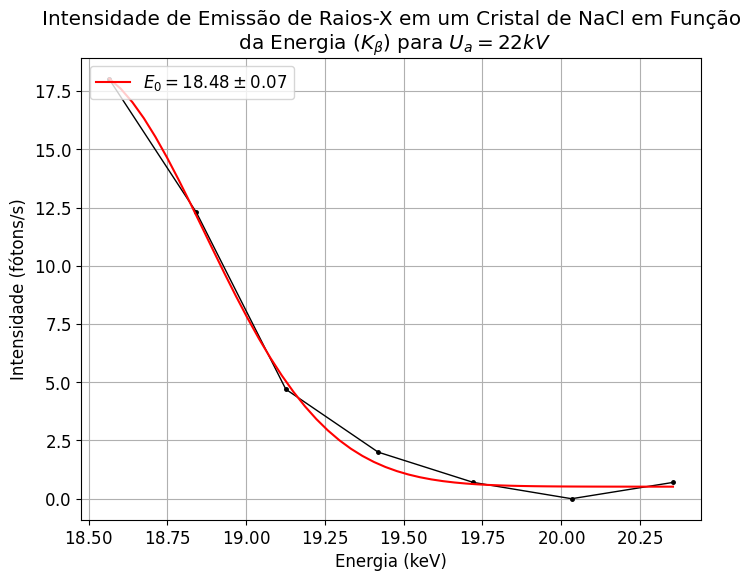

In [7]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)

def gaussiana_plot(dados_x, dados_y, color_plot):
    par = gaussiana_fit(dados_x, dados_y)
    x_model = np.linspace(min(dados_x), max(dados_x))  
    y_model = gaussiana(x_model, par[0][0], par[0][1], par[0][2], par[0][3])
    grafico.plot(x_model, y_model, color = color_plot, label = f'$E_0 = {par[0][1]:.4} \pm {par[1][1]:.1}$')

# plot dos pontos:
grafico3 = grafico.plot(gauss_nacl_x_e[37:44], gauss_nacl_y[37:44], marker = '.', markersize=5, color = 'black', linewidth = 1)


# plot do ajuste
gaussiana_plot(gauss_nacl_x_e[37:44], gauss_nacl_y[37:44], 'red')

# grafico.axvline(x = x_encontro, color = 'blue', label = f'$V_0$ = {x_encontro: .2} V', linestyle = '--')


grafico.grid(True)
grafico.set_xlabel('Energia (keV)') # eixo x
grafico.set_ylabel('Intensidade (fótons/s)') # eixo y
grafico.set_title('Intensidade de Emissão de Raios-X em um Cristal de NaCl em Função\n da Energia ($K_\\beta$) para $U_a = 22kV$') #título
grafico.legend(loc = 'upper left', fontsize= 12)

#    plt.savefig('Acr25graus.png')
plt.show()


C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


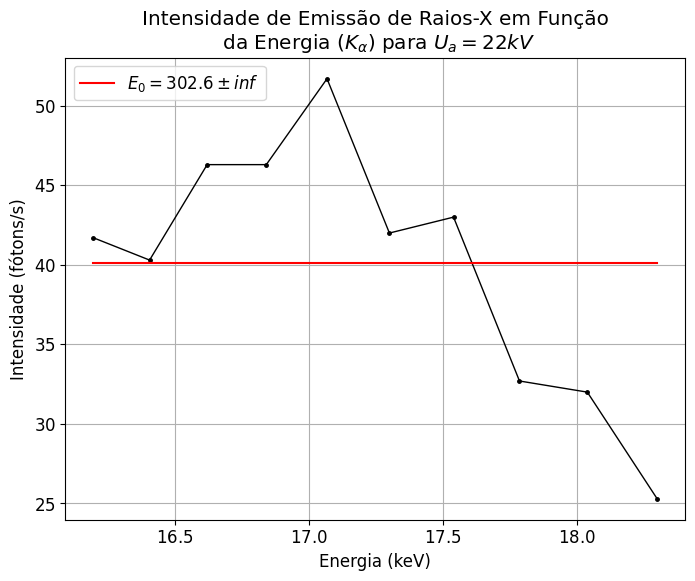

In [8]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)

def gaussiana_plot(dados_x, dados_y, color_plot):
    par = gaussiana_fit(dados_x, dados_y)
    x_model = np.linspace(min(dados_x), max(dados_x))  
    y_model = gaussiana(x_model, par[0][0], par[0][1], par[0][2], par[0][3])
    grafico.plot(x_model, y_model, color = color_plot, label = f'$E_0 = {par[0][1]:.4} \pm {par[1][1]:.1}$')

# plot dos pontos:
grafico3 = grafico.plot(gauss_nacl_x_e[44:54], gauss_nacl_y[44:54], marker = '.', markersize=5, color = 'black', linewidth = 1)


# plot do ajuste
gaussiana_plot(gauss_nacl_x_e[44:54], gauss_nacl_y[44:54], 'red')

#grafico.axvline(x = x_encontro, color = 'blue', label = f'$V_0$ = {x_encontro: .2} V', linestyle = '--')


grafico.grid(True)
grafico.set_xlabel('Energia (keV)') # eixo x
grafico.set_ylabel('Intensidade (fótons/s)') # eixo y
grafico.set_title('Intensidade de Emissão de Raios-X em Função\n da Energia ($K_\\alpha$) para $U_a = 22kV$') #título
grafico.legend(loc = 'upper left', fontsize= 12)

#    plt.savefig('Acr25graus.png')
plt.show()


In [12]:
i = 0
while gauss_nacl_y[i] < max(gauss_nacl_y)*0.05:
    i += 1
l = 2*d*np.sin(gauss_nacl_x[i+1]*np.pi/180)
h = 1e3*18*l/c
sh = 2*d*1e3*22*(l/(c*np.tan(gauss_nacl_x[i+1]*np.pi/180)))*0.1*np.pi/180
h, sh

(3.950870982326147e-15, 4.046331222366676e-26)

In [10]:
gauss_nacl_x[i]

6.6

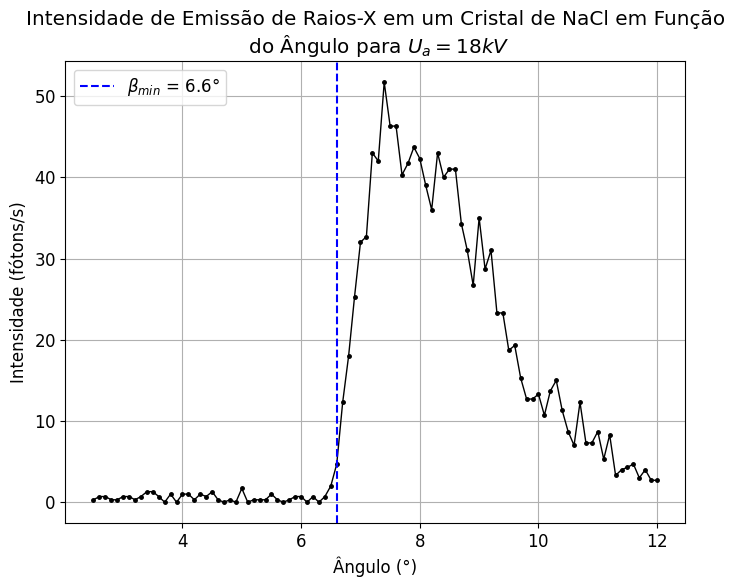

In [11]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)

# plot dos pontos:
grafico3 = grafico.plot(gauss_nacl_x, gauss_nacl_y, marker = '.', markersize=5, color = 'black', linewidth = 1)


# plot do ajuste

grafico.axvline(x = gauss_nacl_x[i], color = 'blue', label = '$\\beta_{min}$ =' + f'{gauss_nacl_x[i]: .2}°', linestyle = '--')


grafico.grid(True)
grafico.set_xlabel('Ângulo (°)') # eixo x
grafico.set_ylabel('Intensidade (fótons/s)') # eixo y
grafico.set_title('Intensidade de Emissão de Raios-X em um Cristal de NaCl em Função\n do Ângulo para $U_a = 18kV$') #título
grafico.legend(loc = 'upper left', fontsize= 12)

#    plt.savefig('Acr25graus.png')
plt.show()
